In [1]:
from scipy.stats import nbinom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def branching(k,R0,G):
    mean = R0
    variance = mean + (mean ** 2) / k
    p = mean / variance
    n = mean ** 2 / (variance - mean)
    i = 1
    
    for gen in range(G):
        new_i = nbinom(n=n, p=p).rvs(size=i).sum()
        if new_i == 0: return True
        else: i = new_i

    return False

def average(k,R0,G):
    iterations = 1000
    count = 0
    for i in range(iterations):
        if branching(k,R0,G) == True:
            count += 1

    q = count / iterations #find probability of dying out
    return q

In [3]:
R0 = 3 
G = 10
q1 = average(0.1,R0,G)
q2 = average(0.5,R0,G)
q3 = average(1.0,R0,G)
q4 = average(5.0,R0,G)
q5 = average(10.0,R0,G)

In [4]:
df = pd.DataFrame({"k": [0.1, 0.5, 1.0, 5.0, 10.0], "q": [q1,q2,q3,q4,q5]})
print(df)

      k      q
0   0.1  0.842
1   0.5  0.499
2   1.0  0.336
3   5.0  0.118
4  10.0  0.088


14


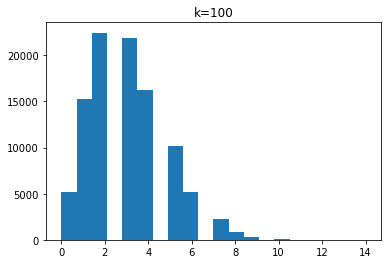

In [5]:
k = 100
R0 = 3 
mean = R0
variance = mean + (mean**2)/k
p = mean/variance
n = mean**2 / (variance - mean)
draws = nbinom.rvs(n=n,p=p,size=100000)
print(max(draws))
plt.hist(draws, bins=20)
plt.title("k=100")
plt.show()

In [6]:
def branching(k, R0, G):
    mean = R0
    variance = mean + (mean ** 2) / k
    p = mean / variance
    n = mean ** 2 / (variance - mean)
    i = 1
    
    for gen in range(G):
        new_i = nbinom(n=n, p=p).rvs(size=i).sum()
        if new_i == 0:
            return i
        else:
            i = new_i

    return 0

def average(k, R0, G, iterations=1000):
    sizes = []
    for i in range(iterations):
        sizes.append(branching(k, R0, G))

    return sizes

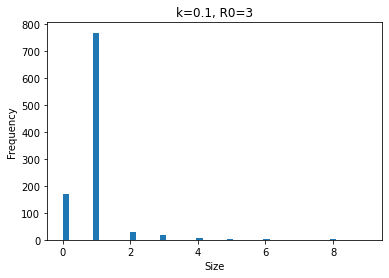

In [7]:
# Parameters
R0 = 3
G = 10
k = 0.1
outbreaks = average(k, R0, G)
plt.hist(outbreaks, bins=50)
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.title("k=0.1, R0=3")
plt.show()

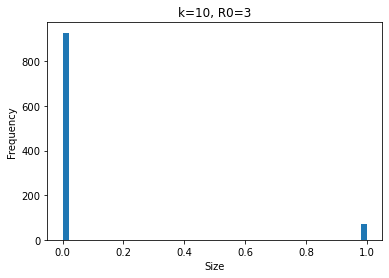

In [8]:
# Parameters
R0 = 3
G = 10
k = 10
outbreaks = average(k, R0, G)
plt.hist(outbreaks, bins=50)
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.title("k=10, R0=3")
plt.show()